In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("~/Desktop/grades.csv")
df.head(10)

,StudentID,QUIZ: Financial Aid Requirement,Career Action Plan Check-In 1,Career Action Plan Check-In 2,Career Action Plan Check-In 3,Part 1 of Final Project - Interview Professional Approval Due Oct 17th,Part 2 of Final Project: Informational Interview - Due November 17th,Week 1: To-DO Points Submission,Week 2: To-DO Points Submission,Week 3: To-DO Points Submission,...,Week 7 Quiz,Week 8 Quiz,Week 9 Quiz,Week 11 Quiz,Week 13 Quiz,Assignments Final Points,Assignments Final Score,Final Points,Final Score,Final Grade
0,NaN,10.00,5.0,5.0,5.0,10,40,0.0,0.0,0.0,...,5,5,5,5,5,225.0,100.00,250.00,100.00,NaN
1,4453174.0,10.00,5.0,5.0,5.0,10,30,NaN,NaN,NaN,...,5,5,5,5,5,215.0,95.56,240.00,96.00,A
2,4403332.0,8.81,5.0,5.0,5.0,10,40,NaN,NaN,NaN,...,5,5,5,5,5,225.0,100.00,248.81,99.53,A
3,4382867.0,10.00,5.0,5.0,0.0,10,40,NaN,NaN,NaN,...,5,0,5,5,5,212.5,94.44,232.50,93.00,A
4,4503271.0,10.00,5.0,5.0,5.0,0,0,NaN,NaN,NaN,...,5,5,5,5,5,115.0,51.11,140.00,56.00,F
5,4510058.0,9.50,5.0,5.0,5.0,0,40,NaN,NaN,NaN,...,5,4,5,5,4,213.0,94.67,237.50,95.00,A
6,4166926.0,9.88,5.0,5.0,2.5,10,30,NaN,NaN,NaN,...,5,4,5,4,5,213.0,94.67,235.38,94.15,A
7,4477314.0,9.81,5.0,5.0,0.0,10,40,NaN,10.0,5.0,...,5,5,5,5,5,225.0,100.00,244.81,97.93,A
8,4389431.0,10.00,5.0,5.0,5.0,10,40,NaN,NaN,NaN,...,5,3,5,5,5,223.0,99.11,248.00,99.20,A
9,4423060.0,10.00,2.5,5.0,5.0,0,40,NaN,0.0,NaN,...,5,5,4,5,5,194.0,86.22,216.50,86.60,B


In [7]:
# Save the "Points Possible" row separately
points_possible = df.iloc[0]

# Keep only student rows (remove row 0)
df = df.iloc[1:].reset_index(drop=True)

# Convert all applicable columns to numbers
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Ensure Final Score column is numeric
df['Final Score'] = pd.to_numeric(df['Final Score'], errors='coerce')

# Drop any rows missing Final Score
df = df.dropna(subset=['Final Score'])

# Convert Final Score to float
df['Final Score'] = df['Final Score'].astype(float)


/var/folders/z2/nqrvw2956m7fq60mbs3bnl5c0000gn/T/ipykernel_1626/2989535922.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


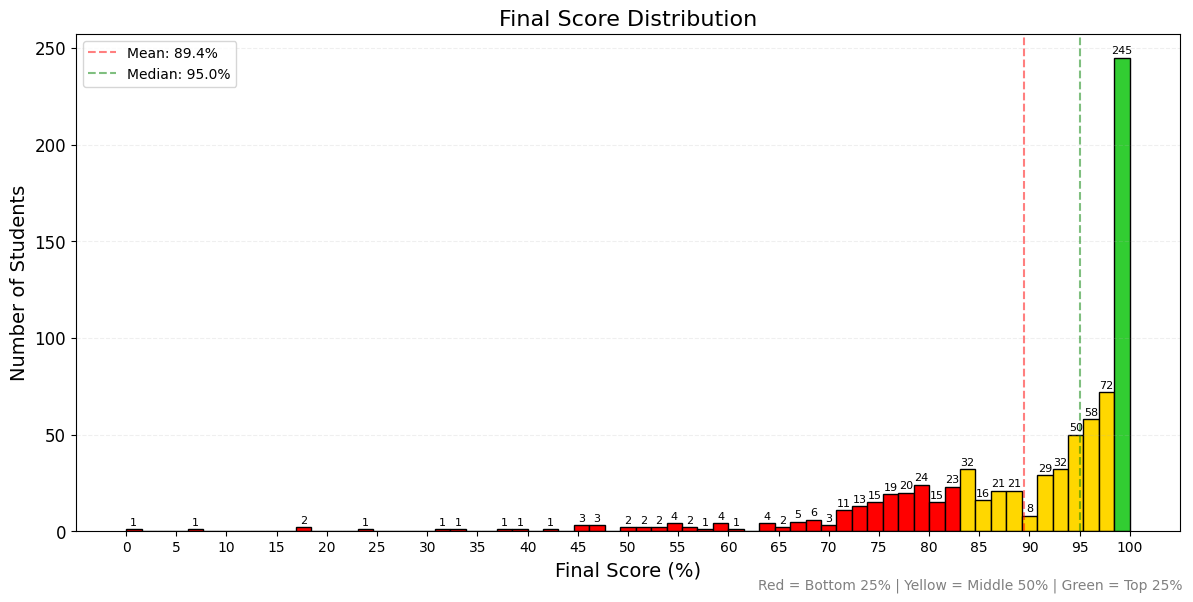

In [8]:
# Step 1: Calculate quartiles
q1 = df['Final Score'].quantile(0.25)
q3 = df['Final Score'].quantile(0.75)
mean_score = df['Final Score'].mean()
median_score = df['Final Score'].median()

#lot histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df['Final Score'], bins=65, edgecolor='black')

#Color bars by 3 bins
for patch, left_edge in zip(patches, bins[:-1]):
    center = left_edge + patch.get_width() / 2

    if center < q1:
        patch.set_facecolor('red')  # Low
    elif center < q3:
        patch.set_facecolor('gold')  # Middle
    else:
        patch.set_facecolor('limegreen')  # High

# Bar labels
for count, patch in zip(counts, patches):
    if count > 0:
        offset = 2 if count < 50 else 2 if count < 150 else 2
        plt.text(patch.get_x() + patch.get_width() / 2,
                 count + offset,
                 str(int(count)),
                 ha='center',
                 fontsize=8)

# Reference lines
plt.axvline(mean_score, color='red', linewidth=1.5, linestyle='--', alpha=0.5, label=f'Mean: {mean_score:.1f}%')
plt.axvline(median_score, color='green', linewidth=1.5, linestyle='--', alpha=0.5, label=f'Median: {median_score:.1f}%')

#Titles and layout
plt.title('Final Score Distribution', fontsize=16)
plt.xlabel('Final Score (%)', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(range(0, 101, 5))
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.legend()
plt.tight_layout()

#footer
plt.figtext(0.99, 0.01, "Red = Bottom 25% | Yellow = Middle 50% | Green = Top 25%", 
            ha='right', fontsize=10, color='gray')

plt.savefig("plots/final_scores.png")
plt.show()